# Analysis of the current state
---

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

In [2]:
data = pd.read_csv("zemi.csv")
data = data[data['junior'] > 0]
data.head()

,id,name,12,13,14,15_1,15_2,15_3,all,junior,...,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16
0,1,aoki,0,0,9,6,5,0,20,11,...,118,1103,1119,1120,2050,NaN,NaN,NaN,NaN,NaN
1,2,ishihara,0,0,9,6,8,0,23,14,...,31,42,101,139,171,1042,1058,2044,NaN,NaN
2,3,itou,0,0,12,13,0,0,25,13,...,174,109,99,96,36,35,34,NaN,NaN,NaN
3,4,ueda,0,0,10,13,0,0,23,13,...,173,1075,1093,2014,2029,2035,2040,NaN,NaN,NaN
4,5,oohashi,0,1,4,2,9,0,16,11,...,1009,1034,0,1109,78,NaN,NaN,NaN,NaN,NaN


In [3]:
# summary statistics
data['junior'].describe()

count    42.000000
mean      9.190476
std       4.244009
min       1.000000
25%       5.250000
50%      10.000000
75%      13.000000
max      16.000000
Name: junior, dtype: float64

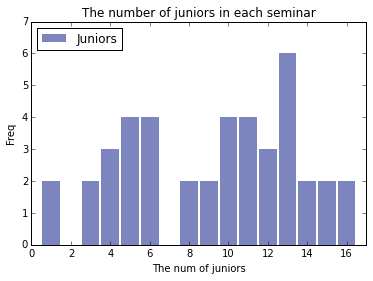

In [4]:
# histgram
junior = thinkstats2.Hist(np.asarray(data['junior']))
thinkplot.PrePlot(2)
thinkplot.Hist(junior, label='Juniors')
thinkplot.Config(title='The number of juniors in each seminar', xlabel='The num of juniors', ylabel='Freq', loc=2, axis=[0, 17, 0, 7])

In [5]:
# separate seminar from lecture
semi = data[data['zemi']==1]
lec = data[data['zemi']==0]

In [6]:
# summary statistics of 'seminar'
semi['junior'].describe()

count    35.000000
mean      9.685714
std       3.916567
min       3.000000
25%       6.000000
50%      10.000000
75%      13.000000
max      16.000000
Name: junior, dtype: float64

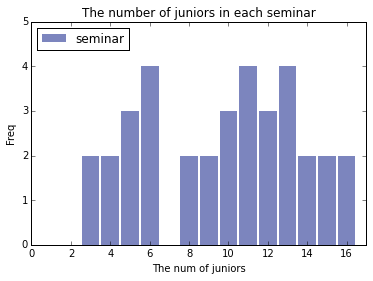

In [7]:
# histgram of 'seminar'
semi_hist = thinkstats2.Hist(np.asarray(semi['junior']))
thinkplot.PrePlot(2)
thinkplot.Hist(semi_hist, label='seminar')
thinkplot.Config(title='The number of juniors in each seminar', xlabel='The num of juniors', ylabel='Freq', loc=2, axis=[0, 17, 0, 5])

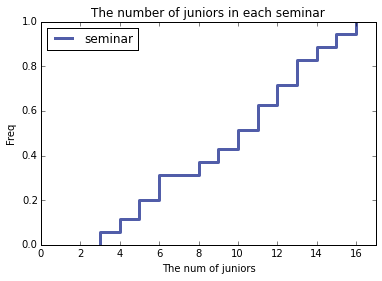

In [17]:
semi_cmf = thinkstats2.Cdf(np.asarray(semi['junior']))
thinkplot.PrePlot(2)
thinkplot.Cdf(semi_cmf, label='seminar')
thinkplot.Config(title='The number of juniors in each seminar', xlabel='The num of juniors', ylabel='Freq', loc=2, axis=[0, 17, 0, 1])

In [8]:
junior = []
double = []
single = []
for i in np.asarray(semi[['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16']], dtype=int).reshape(16*35).tolist():
    if i >=0:
        junior.append(i)
hist = thinkstats2.Hist(junior)
for val, freq in hist.Items():
    if freq == 2:
        double.append(val)
    elif freq == 1:
        single.append(val)
    else:
        print('ERROR')
print('Capa' ,str(len(junior)))
print('Single', len(single))
print('Double', len(double))
print('None', 345-len(single)-len(double))
print('All', len(single)+len(double))

ERROR
('Capa', '339')
('Single', 233)
('Double', 51)
('None', 61)
('All', 284)
